The objective of this assignment is to assess your understanding of the process of building, training, and evaluating various machine learning models using a medical dataset. This assignment aims to enhance your skills in data preprocessing, model training, performance evaluation, and result visualization, ultimately enabling you to determine which model performs best for predicting heart disease.

<h2> Dataset: </h2>

Use the `Heart Disease` dataset from this [link](https://drive.google.com/file/d/181O6AUx7naNTXQPYwLb7kC2wYwmHTWAK/view?usp=sharing). This dataset contains information on various medical attributes of patients and whether they have heart disease.

### Tasks:
1. **Data Preparation: (30 points)**
   - Load the Heart Disease dataset.
   - Perform any necessary data preprocessing, including handling missing values, encoding categorical variables, and normalizing/standardizing the data if needed.
   - Write a short description of your preprocessing steps with justification for your actions. Explain how you handled missing values and why you chose to remove or impute certain values, rows, or columns. Additionally, describe the type of encoding you used for categorical variables and the rationale behind your choices.

2. **Data Splitting:(10points)**
   - Split the dataset into training and testing sets using `train_test_split` from the `sklearn.model_selection` module. Use an 80-20 split for training and testing, respectively.

3. **Model Training:(30points)**
   - Initialize and train the following models using the training data:
     - Random Forest
     - Gradient Boosting
     - AdaBoost
     - Logistic Regression

4. **Model Evaluation:(30points)**
   - Evaluate the models on the test data using accuracy score.
   - Create a bar chart to visualize the accuracy of each model. The x-axis should have the model names, and the y-axis should represent the accuracy scores.

**Complete all of the above tasks, and then submit the notebook on Canvas.**

## Task 1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

path = 'HeartDisease.csv'
df = pd.read_csv(filepath_or_buffer=path)
df.head()


# Identify numeric and categorical columns
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'Oldpeak', 'MaxHR']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)



Write your description here:

## Task 2

In [2]:
# Select features and target variable
X = df.drop(columns=['HeartDisease', 'ExerciseAngina'])
y = df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 3

In [3]:
# Define the random forest pipeline with preprocessing and model
randomForestpipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Fit the pipeline to the training data
randomForestpipe.fit(X_train, y_train)
randomforestPredictions = randomForestpipe.predict(X_test) 
predDf = pd.DataFrame(randomforestPredictions, columns=['Random Forest'])

# Define the gradient boosting pipeline with preprocessing and model
gradientBoostingPipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

# Fit the pipeline to the training data
gradientBoostingPipe.fit(X_train, y_train)
gradBoostPredictions = gradientBoostingPipe.predict(X_test) 
predDf['Gradient Boost'] = gradBoostPredictions

# Define the gradient boosting pipeline with preprocessing and model
adaBoostPipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', AdaBoostClassifier())
])

# Fit the pipeline to the training data
adaBoostPipe.fit(X_train, y_train)
adaBoostPredictions = adaBoostPipe.predict(X_test) 
predDf['Ada Boost'] = adaBoostPredictions

# Define the gradient boosting pipeline with preprocessing and model
logisticPipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

# Fit the pipeline to the training data
logisticPipe.fit(X_train, y_train)
LogesticPredictions = logisticPipe.predict(X_test) 
predDf['Logestic Regression'] = LogesticPredictions


display(predDf)


C:\Users\yugpa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Random Forest,Gradient Boost,Ada Boost,Logestic Regression
0,0,0,0,0
1,1,1,1,0
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
179,0,0,0,0
180,1,1,1,1
181,1,1,1,1
182,0,0,0,0


## Task 4

,Random Forest,Gradient Boost,Ada Boost,Logestic Regression
0,0.891304,0.880435,0.847826,0.858696


<BarContainer object of 4 artists>

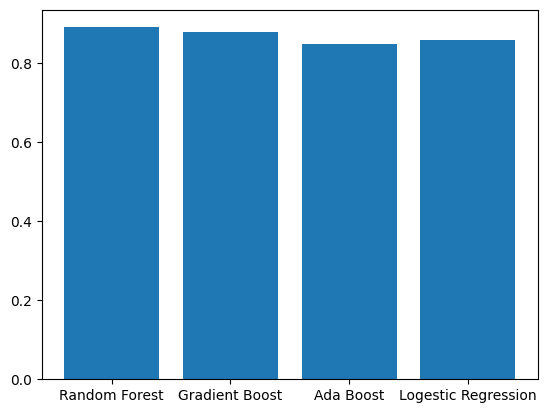

In [29]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
accuracy_scores = {
    'Random Forest': [accuracy_score(predDf['Random Forest'], y_test)],
    'Gradient Boost': [accuracy_score(predDf['Gradient Boost'], y_test)],
    'Ada Boost': [accuracy_score(predDf['Ada Boost'], y_test)],
    'Logestic Regression': [accuracy_score(predDf['Logestic Regression'], y_test)]
}
accuracy = pd.DataFrame(accuracy_scores)

display(accuracy)
plt.bar(accuracy.columns, accuracy.iloc[0])